# Project 2: Ames Housing Data and Kaggle Challenge

### Imports

In [1013]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas.api.types import CategoricalDtype 
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder

In [899]:
# Import Data
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

### Training dataset

In [900]:
# train total rows and columns
train.shape

(2051, 81)

In [901]:
# Print the first 5 rows of the data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [902]:
# Check column with null value
train.isnull().sum().to_frame(name='counts').sort_values('counts', ascending = False).query('counts > 0')

,counts
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000
Lot Frontage,330
Garage Finish,114
Garage Qual,114
Garage Yr Blt,114
Garage Cond,114


In [903]:
#drop column with null more than 5%
train['Garage Type'].isnull().sum()/len(train)

0.05509507557289127

In [904]:
# Drop 5 columns with null value more than 5%
train1 = train.drop(columns=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage','Garage Finish','Garage Qual','Garage Yr Blt','Garage Cond','Garage Type'])

In [905]:
# Check rows and columns
train1.shape

(2051, 70)

In [906]:
# Check column with null value
train1.isnull().sum().to_frame(name='counts').sort_values('counts', ascending = False).query('counts > 0')

,counts
Bsmt Exposure,58
BsmtFin Type 2,56
Bsmt Cond,55
Bsmt Qual,55
BsmtFin Type 1,55
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Half Bath,2
Bsmt Full Bath,2
Garage Cars,1


In [907]:
# drop rows with null value
train1.dropna(inplace = True)

In [908]:
# Check remaining rows and columns
train1.shape

(1969, 70)

In [909]:
# drop rows ~4%
1969/2051

0.9600195026816187

In [910]:
train1.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bat

### Testing data set

In [911]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [912]:
# test total rows and columns
test.shape

(879, 80)

In [913]:
# drop columns as same as training data
test1 = test.drop(columns=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage','Garage Finish','Garage Qual','Garage Yr Blt','Garage Cond','Garage Type'])

In [914]:
test1.isnull().sum().sort_values(ascending = False)

BsmtFin Type 2     25
Bsmt Qual          25
Bsmt Exposure      25
Bsmt Cond          25
BsmtFin Type 1     25
Electrical          1
Mas Vnr Area        1
Mas Vnr Type        1
Lot Area            0
Street              0
PID                 0
MS SubClass         0
MS Zoning           0
Foundation          0
Exter Cond          0
Exter Qual          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Overall Cond        0
BsmtFin SF 1        0
House Style         0
Bldg Type           0
Condition 2         0
Condition 1         0
Neighborhood        0
Land Slope          0
Lot Config          0
Utilities           0
Land Contour        0
Lot Shape           0
Overall Qual        0
Sale Type           0
Yr Sold             0
Kitchen Qual        0
Mo Sold             0
Misc Val            0
Pool Area           0
Screen Porch        0
3Ssn Porch          0
Enclosed Porch      0
Open Porch SF       0
Wood Deck 

### Exploratory Data Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

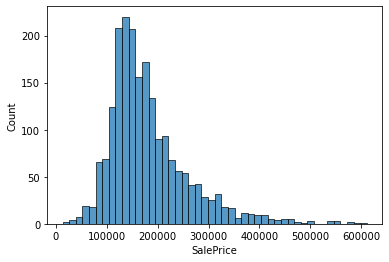

In [915]:
# distribution of sale price
sns.histplot(train['SalePrice'])

In [916]:
train1['SalePrice'].describe()

count      1969.000000
mean     182892.861859
std       78938.334289
min       12789.000000
25%      130000.000000
50%      163500.000000
75%      214900.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [917]:
# Outliner on sale price more than 400000
# drop house with price more than 400000
train1 = train1[train1['SalePrice'] < 400000.00]

In [918]:
train1['SalePrice'].describe()

count      1924.000000
mean     176226.227131
std       65948.639016
min       12789.000000
25%      130000.000000
50%      161000.000000
75%      210287.500000
max      398800.000000
Name: SalePrice, dtype: float64

In [919]:
#Average sale price
train['SalePrice'].mean()

181469.70160897123

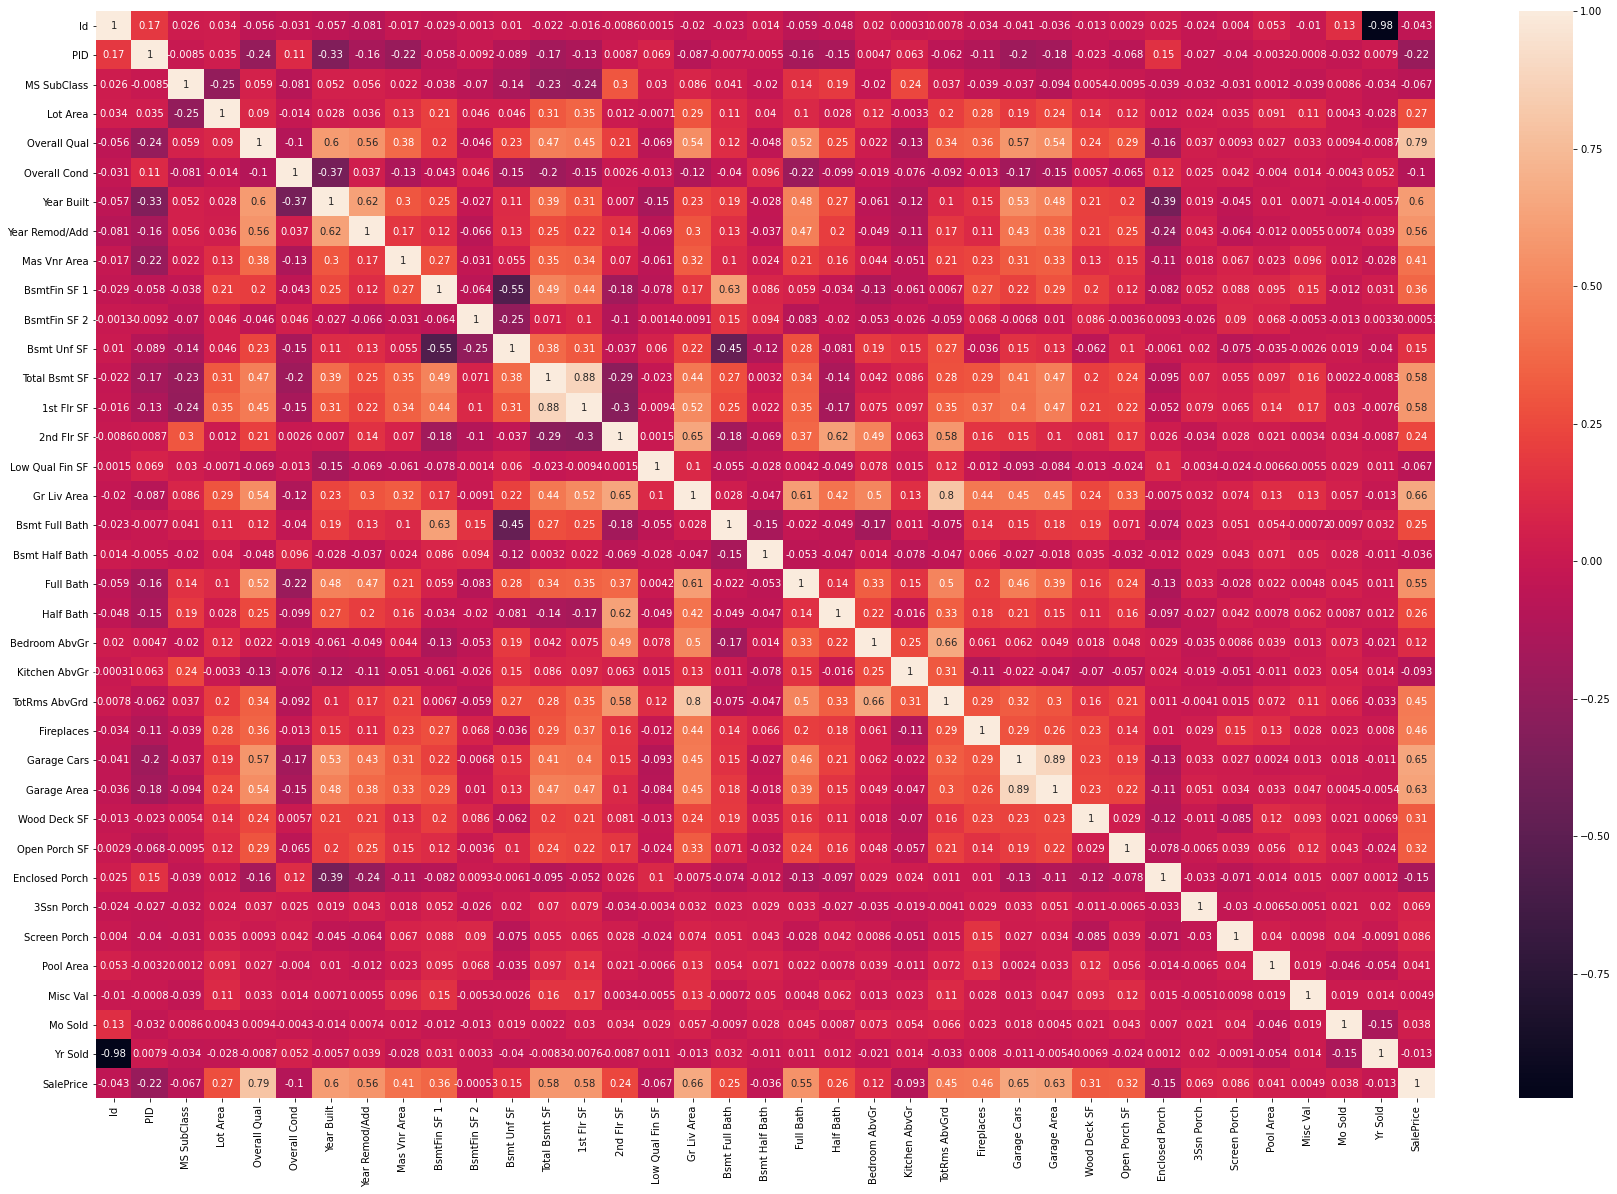

In [920]:
# Plot Heatmap to see correlation between SalePrice and all numeric variables
plt.figure(figsize=(30,20))
sns.heatmap(train1.corr(), annot=True);

In [921]:
# Correlation of numeric data to SalePrice
train1.corr()['SalePrice'].sort_values().to_frame()

,SalePrice
PID,-0.224410
Enclosed Porch,-0.151530
Overall Cond,-0.102050
Kitchen AbvGr,-0.093010
Low Qual Fin SF,-0.067281
MS SubClass,-0.066974
Id,-0.043455
Bsmt Half Bath,-0.035583
Yr Sold,-0.012850
BsmtFin SF 2,-0.000528


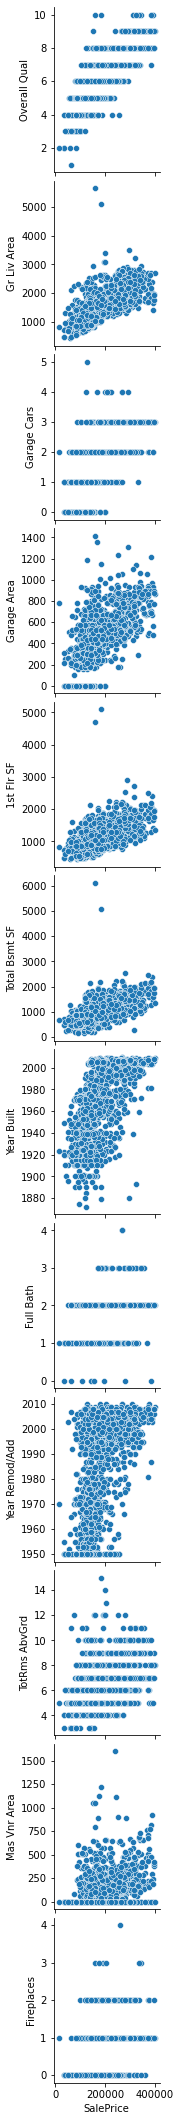

In [922]:
# Using only the ones with correlation of more than 0.4 with SalePrice
sns.pairplot(train1,y_vars=['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','1st Flr SF','Total Bsmt SF','Year Built',
                            'Full Bath','Year Remod/Add','TotRms AbvGrd','Mas Vnr Area','Fireplaces']
             ,x_vars=['SalePrice']);

In [923]:
lr = LinearRegression()
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))
lasso = LassoCV(n_alphas=100)
el = ElasticNetCV(n_alphas=100, l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ss = StandardScaler()


def model_train_sc_fit(X,y):
    ss.fit(X)
    X_sc = ss.transform(X)
    
    lr.fit(X_sc,y)
    ridge.fit(X_sc,y)
    lasso.fit(X_sc,y)
    el.fit(X_sc,y)

    print('Linear')
    lr_r2_score = lr.score(X_sc,y)
    print("R2 Score:",lr_r2_score)
    lr_cv_r2_xsc = cross_val_score(lr, X_sc, y, cv=5)
    print("R2 CV Score:",lr_cv_r2_xsc.mean())
    lr_cv_rmse_xsc = cross_val_score(lr,X_sc,y,cv=5,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(lr_cv_rmse_xsc.mean()))

    print('')
    print('Ridge')
    ridge_r2_score = ridge.score(X_sc,y)
    print("R2 Score:", ridge_r2_score)
    ridge_cv_r2_xsc = cross_val_score(ridge, X_sc, y, cv=5)
    print("R2 CV Score:",ridge_cv_r2_xsc.mean())
    ridge_cv_rmse_xsc = cross_val_score(ridge,X_sc,y,cv=5,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(ridge_cv_rmse_xsc.mean()))


    print('')
    print('Lasso')
    lasso_r2_score = lasso.score(X_sc,y)
    print("R2 Score:", lasso_r2_score)
    lasso_cv_r2_xsc = cross_val_score(lasso, X_sc, y, cv=5)
    print("R2 CV Score",lasso_cv_r2_xsc.mean())
    lasso_cv_rmse_xsc = cross_val_score(lasso,X_sc,y,cv=5,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(lasso_cv_rmse_xsc.mean()))
    
    print('')
    print('ElasticNet')
    el_r2_score = el.score(X_sc,y)
    print("R2 Score:", el_r2_score)
    el_cv_r2_xsc = cross_val_score(el, X_sc, y, cv=5)
    print("R2 CV Score",el_cv_r2_xsc.mean())
    el_cv_rmse_xsc = cross_val_score(el,X_sc,y,cv=5,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(el_cv_rmse_xsc.mean()))
    

# Model 1
#### Only numeric columns

## Training

In [924]:
features = train1[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','1st Flr SF','Total Bsmt SF','Year Built',
                            'Full Bath','Year Remod/Add','TotRms AbvGrd','Mas Vnr Area','Fireplaces']]
X = features
y = train1['SalePrice']

In [925]:
features.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
1st Flr SF        0
Total Bsmt SF     0
Year Built        0
Full Bath         0
Year Remod/Add    0
TotRms AbvGrd     0
Mas Vnr Area      0
Fireplaces        0
dtype: int64

In [926]:
train1['SalePrice'].isnull().sum()

0

### Standard Scaler

In [927]:
ss = StandardScaler()
ss.fit(X)
X_sc = ss.transform(X)

### Model with Linear, Ridge ,Lasso and ElasticNet

In [928]:
model_train_sc_fit(X,y)

Linear
R2 Score: 0.7996147145972109
R2 CV Score: 0.7855437288839151
RMSE CV: 30221.46407616128

Ridge
R2 Score: 0.799604903858373
R2 CV Score: 0.7860498084601606
RMSE CV: 30193.7240199218

Lasso
R2 Score: 0.7987186662348575
R2 CV Score 0.7849792307504031
RMSE CV: 30284.65687214273

ElasticNet
R2 Score: 0.7987186662348575
R2 CV Score 0.7849792307504031
RMSE CV: 30284.65687214273


## Testing

In [929]:
test1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,1,440,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,2,580,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,2,426,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,2,480,N,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,2,514,Y,0,76,0,0,185,0,0,7,2009,WD


In [930]:
features = test1[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','1st Flr SF','Total Bsmt SF','Year Built',
                            'Full Bath','Year Remod/Add','TotRms AbvGrd','Mas Vnr Area','Fireplaces']]
X_test = features

In [931]:
features.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,TotRms AbvGrd,Mas Vnr Area,Fireplaces
0,6,1928,1,440,908,1020,1910,2,1950,9,0.0,0
1,5,1967,2,580,1967,1967,1977,2,1977,10,0.0,0
2,7,1496,2,426,664,654,2006,2,2006,7,0.0,1
3,5,968,2,480,968,968,1923,1,2006,5,0.0,0
4,6,1394,2,514,1394,1394,1963,1,1963,6,247.0,2


In [932]:
#Check null value in testing features
features.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
1st Flr SF        0
Total Bsmt SF     0
Year Built        0
Full Bath         0
Year Remod/Add    0
TotRms AbvGrd     0
Mas Vnr Area      1
Fireplaces        0
dtype: int64

In [933]:
features[features['Mas Vnr Area'].isnull()]

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,TotRms AbvGrd,Mas Vnr Area,Fireplaces
866,7,1725,2,550,840,840,2002,2,2002,6,NaN,0


In [934]:
# Mas Vnr Area  is Masonry veneer area in square feet so replace null with 0

In [935]:
features_values = {'Mas Vnr Area':0}

features.fillna(value=features_values, inplace=True)

C:\Users\ACDMY2\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [936]:
#Check null value in testing features
features.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
1st Flr SF        0
Total Bsmt SF     0
Year Built        0
Full Bath         0
Year Remod/Add    0
TotRms AbvGrd     0
Mas Vnr Area      0
Fireplaces        0
dtype: int64

### Standard Scaler

In [937]:
ss = StandardScaler()
ss.fit(X_test)
X_test_sc = ss.transform(X_test)

In [938]:
X_test_sc

array([[-0.03974422,  0.82663533, -0.99106609, ...,  1.58560241,
        -0.56787607, -0.92518345],
       [-0.76756033,  0.90205319,  0.3409631 , ...,  2.20976028,
        -0.56787607, -0.92518345],
       [ 0.68807188, -0.00876256,  0.3409631 , ...,  0.33728668,
        -0.56787607,  0.56973613],
       ...,
       [-0.76756033, -0.55989311, -0.99106609, ..., -0.91102906,
        -0.56787607,  0.56973613],
       [-1.49537644, -1.23091873,  0.3409631 , ..., -0.91102906,
        -0.56787607, -0.92518345],
       [-0.76756033, -1.11295745, -0.99106609, ..., -0.91102906,
        -0.56787607,  2.06465571]])

### Testing Model with Linear, Ridge and Lasso

#### Linear

In [939]:
#Linear
test1['SalePrice'] = lr.predict(X_test_sc)
test1_lr = test1[['Id','SalePrice']]
test1_lr.to_csv('test1_lr.csv', index=False)

#### Ridge

In [940]:
#Ridge
test1['SalePrice'] = ridge.predict(X_test_sc)
test1_ridge = test1[['Id','SalePrice']]
test1_ridge.to_csv('test1_ridge.csv', index=False)

#### Lasso

In [941]:
#Lasso
test1['SalePrice'] = lasso.predict(X_test_sc)
test1_lasso = test1[['Id','SalePrice']]
test1_lasso.to_csv('test1_lasso.csv', index=False)

# Model 2
#### Add more Ordinal columns

#### Prep data

In [942]:
train1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,2.0,475.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,2.0,559.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,1.0,246.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,2.0,484.0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [943]:
train1.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
    

In [944]:
train1['Exter Qual'].unique()

#Ex Excellent
#Gd Good
#TA Average/Typical
#Fa Fair
#Po Poor

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [945]:
order = ['Po','Fa','TA','Gd','Ex']

In [946]:
enc = OrdinalEncoder(categories=[order])
enc.fit(train1[['Exter Qual']])
train1[['Exter Qual']] = enc.transform(train1[['Exter Qual']])

In [947]:
def to_ordinal(x,order):
    enc = OrdinalEncoder(categories=[order])
    enc.fit(train1[[x]])
    train1[[x]] = enc.transform(train1[[x]])

In [948]:
train1['Exter Cond'].unique()
#Ex Excellent
#Gd Good
#TA Average/Typical
#Fa Fair
#Po Poor

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [949]:
train1['Bsmt Qual'].unique()
#Ex Excellent
#Gd Good
#TA Average/Typical
#Fa Fair
#Po Poor
#nan no basement

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [950]:
train1['Bsmt Qual'].isnull().sum()

0

In [951]:
#fill null with NA so we can sort
train1['Bsmt Qual'].fillna('NA',inplace=True)
train1['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [952]:
order_nan = ['NA','Po','Fa','TA','Gd','Ex']
to_ordinal('Bsmt Qual',order_nan)

In [953]:
train1['Bsmt Cond'].unique()
#Ex Excellent
#Gd Good
#TA Average/Typical
#Fa Fair
#Po Poor
#nan no basement

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [954]:
#fill null with NA so we can sort
train1['Bsmt Cond'].fillna('NA',inplace=True)
train1['Bsmt Cond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [955]:
to_ordinal('Bsmt Cond',order_nan)

In [956]:
train1['Heating QC'].unique()
#Ex Excellent
#Gd Good
#TA Average/Typical
#Fa Fair
#Po Poor

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [957]:
to_ordinal('Heating QC',order)

In [958]:
train1['Kitchen Qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [959]:
to_ordinal('Kitchen Qual',order)

In [960]:
train1['Exter Cond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [961]:
to_ordinal('Exter Cond',order)

In [962]:
train1['Heating QC'].unique()

array([4., 2., 3., 1., 0.])

In [965]:
train1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,4.0,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,Typ,0,2.0,475.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,4.0,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,Typ,1,2.0,559.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,3.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2.0,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3.0,5,Typ,0,1.0,246.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3.0,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2.0,7,Typ,0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2.0,2.0,PConc,2.0,4.0,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2.0,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2.0,6,Typ,0,2.0,484.0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [966]:
train1.isnull().sum().sort_values(ascending = False)

SalePrice          0
Mas Vnr Area       0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Exter Qual         0
Overall Cond       0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
Year Built         0
Overall Qual       0
Sale Type          0
Land Contour       0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Utilities          0
House Style        0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Open Porch SF      0
Functional         0
Fireplaces         0
Garage Cars        0
Garage Area        0
Paved Drive        0
Wood Deck SF       0
Enclosed Porch     0
Bsmt Unf SF        0
3Ssn Porch         0
Screen Porch 

In [967]:
#Check # of rows and columns of train2
train1.shape

(1924, 70)

In [968]:
train1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,4.0,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,Typ,0,2.0,475.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,4.0,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,Typ,1,2.0,559.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,3.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2.0,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3.0,5,Typ,0,1.0,246.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3.0,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2.0,7,Typ,0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2.0,2.0,PConc,2.0,4.0,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2.0,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2.0,6,Typ,0,2.0,484.0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [969]:
#ckeck correlation with SalePrice

train1.corr()['SalePrice'].sort_values().to_frame()

,SalePrice
PID,-0.224410
Enclosed Porch,-0.151530
Overall Cond,-0.102050
Kitchen AbvGr,-0.093010
Low Qual Fin SF,-0.067281
MS SubClass,-0.066974
Id,-0.043455
Bsmt Half Bath,-0.035583
Yr Sold,-0.012850
BsmtFin SF 2,-0.000528


## Training

In [970]:
#select features
features2 = train2[['BsmtFin SF 1','Heating QC','Fireplaces','TotRms AbvGrd','Mas Vnr Area','Full Bath','Fireplace Qu','Year Remod/Add'
                   ,'Year Built','Bsmt Qual','1st Flr SF','Total Bsmt SF','Garage Cars','Garage Area','Kitchen Qual','Gr Liv Area'
                   ,'Exter Qual','Overall Qual']]
X2 = features2
y = train2['SalePrice']

In [971]:
X2.shape

(2051, 18)

In [972]:
#Check for null value in features2
features2.isnull().sum().sort_values(ascending=False)

Mas Vnr Area      22
BsmtFin SF 1       1
Garage Area        1
Garage Cars        1
Total Bsmt SF      1
Fireplace Qu       0
Heating QC         0
Fireplaces         0
TotRms AbvGrd      0
Full Bath          0
Overall Qual       0
Year Remod/Add     0
Exter Qual         0
Bsmt Qual          0
1st Flr SF         0
Kitchen Qual       0
Gr Liv Area        0
Year Built         0
dtype: int64

In [973]:
#MasVnrArea: Masonry veneer area in square feet
#BsmtFinSF1: Type 1 finished square feet
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#TotalBsmtSF: Total square feet of basement area

In [974]:
#fill in features value with proper value
features2_values = {'Mas Vnr Area':0,'BsmtFin SF 1':0,'Garage Area':0,'Garage Cars':0,'Total Bsmt SF':0}

features2.fillna(value=features2_values, inplace=True)

C:\Users\ACDMY2\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [975]:
#Check for null value in features2
features2.isnull().sum().sort_values(ascending=False)

Overall Qual      0
Exter Qual        0
Heating QC        0
Fireplaces        0
TotRms AbvGrd     0
Mas Vnr Area      0
Full Bath         0
Fireplace Qu      0
Year Remod/Add    0
Year Built        0
Bsmt Qual         0
1st Flr SF        0
Total Bsmt SF     0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Gr Liv Area       0
BsmtFin SF 1      0
dtype: int64

In [976]:
model_train_sc_fit(X2,y)

Linear
R2 Score: 0.8282982115821154
R2 CV Score: 0.8189160901062014
RMSE CV: 33493.57365666858

Ridge
R2 Score: 0.8282926527313741
R2 CV Score: 0.81925853602639
RMSE CV: 33465.88215797334

Lasso
R2 Score: 0.8280273599510073
R2 CV Score 0.8211504496855622
RMSE CV: 33306.06517742046

ElasticNet
R2 Score: 0.8280273599510073
R2 CV Score 0.8211504496855622
RMSE CV: 33306.06517742046


## Testing

#### Prep test data

In [977]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


#### convert all ordinal data type

In [978]:
def to_ordinal_test(x,order):
    enc = OrdinalEncoder(categories=[order])
    enc.fit(test[[x]])
    test[[x]] = enc.transform(test[[x]])

In [979]:
test['Exter Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object)

In [980]:
to_ordinal_test('Exter Qual',order)

In [981]:
test['Exter Cond'].unique()

array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object)

In [982]:
to_ordinal_test('Exter Cond',order)

In [983]:
test['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object)

In [984]:
test['Bsmt Qual'].fillna('NA',inplace=True)
test['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', 'NA', 'Po'], dtype=object)

In [985]:
to_ordinal_test('Bsmt Qual',order_nan)

In [986]:
test['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa'], dtype=object)

In [987]:
test['Bsmt Cond'].fillna('NA',inplace=True)
test['Bsmt Cond'].unique()

array(['TA', 'Gd', 'NA', 'Fa'], dtype=object)

In [988]:
to_ordinal_test('Bsmt Cond',order_nan)

In [989]:
test['Heating QC'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [990]:
to_ordinal_test('Heating QC',order)

In [991]:
test['Kitchen Qual'].unique()

array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object)

In [992]:
to_ordinal_test('Kitchen Qual',order)

In [993]:
test['Garage Cond'].unique()

array(['Po', 'TA', nan, 'Fa', 'Gd', 'Ex'], dtype=object)

In [994]:
test['Garage Cond'].fillna('NA',inplace=True)
test['Garage Cond'].unique()

array(['Po', 'TA', 'NA', 'Fa', 'Gd', 'Ex'], dtype=object)

In [995]:
to_ordinal_test('Garage Cond',order_nan)

In [996]:
test['Garage Qual'].unique()

array(['Po', 'TA', 'Fa', nan, 'Gd'], dtype=object)

In [997]:
test['Garage Qual'].fillna('NA',inplace=True)
test['Garage Qual'].unique()

array(['Po', 'TA', 'Fa', 'NA', 'Gd'], dtype=object)

In [998]:
to_ordinal_test('Garage Qual',order_nan)

In [999]:
test['Fireplace Qu'].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [1000]:
test['Fireplace Qu'].fillna('NA',inplace=True)
test['Fireplace Qu'].unique()

array(['NA', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [1001]:
to_ordinal_test('Fireplace Qu',order_nan)

In [1002]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2.0,1.0,Stone,2.0,3.0,No,Unf,0,Unf,0,1020,1020,GasA,3.0,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,1.0,9,Typ,0,0.0,Detchd,1910.0,Unf,1,440,1.0,1.0,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2.0,2.0,CBlock,4.0,3.0,No,Unf,0,Unf,0,1967,1967,GasA,2.0,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,2.0,10,Typ,0,0.0,Attchd,1977.0,Fin,2,580,3.0,3.0,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,2.0,PConc,4.0,4.0,Av,GLQ,554,Unf,0,100,654,GasA,4.0,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,3.0,7,Typ,1,4.0,Attchd,2006.0,RFn,2,426,3.0,3.0,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3.0,2.0,CBlock,3.0,3.0,No,Unf,0,Unf,0,968,968,GasA,2.0,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,2.0,5,Typ,0,0.0,Detchd,1935.0,Unf,2,480,2.0,3.0,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2.0,2.0,CBlock,4.0,3.0,No,BLQ,609,Unf,0,785,1394,GasA,3.0,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,2.0,6,Typ,2,4.0,Attchd,1963.0,RFn,2,514,3.0,3.0,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


#### test feature2

In [1003]:
features2 = test[['BsmtFin SF 1','Heating QC','Fireplaces','TotRms AbvGrd','Mas Vnr Area','Full Bath','Fireplace Qu','Year Remod/Add'
                   ,'Year Built','Bsmt Qual','1st Flr SF','Total Bsmt SF','Garage Cars','Garage Area','Kitchen Qual','Gr Liv Area'
                   ,'Exter Qual','Overall Qual']]
X2_test = features2

In [1004]:
X2_test.isnull().sum()

BsmtFin SF 1      0
Heating QC        0
Fireplaces        0
TotRms AbvGrd     0
Mas Vnr Area      1
Full Bath         0
Fireplace Qu      0
Year Remod/Add    0
Year Built        0
Bsmt Qual         0
1st Flr SF        0
Total Bsmt SF     0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Gr Liv Area       0
Exter Qual        0
Overall Qual      0
dtype: int64

In [1005]:
#fill in features value with proper value
features2_values = {'Mas Vnr Area':0,'BsmtFin SF 1':0,'Garage Area':0,'Garage Cars':0,'Total Bsmt SF':0}

X2_test.fillna(value=features2_values, inplace=True)

C:\Users\ACDMY2\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [1006]:
X2_test.isnull().sum()

BsmtFin SF 1      0
Heating QC        0
Fireplaces        0
TotRms AbvGrd     0
Mas Vnr Area      0
Full Bath         0
Fireplace Qu      0
Year Remod/Add    0
Year Built        0
Bsmt Qual         0
1st Flr SF        0
Total Bsmt SF     0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Gr Liv Area       0
Exter Qual        0
Overall Qual      0
dtype: int64

In [1010]:
X2_test.shape

(879, 18)

In [1011]:
#export testing with lasso since its the best one.

In [1012]:
ss.fit(X2_test)
X2_test_sc = ss.transform(X2_test)
X2_sc = ss.transform(X2)

#Best result from training is Lasso
lasso.fit(X2_sc,y)

test['SalePrice'] = lasso.predict(X2_test_sc)
test2_lasso = test[['Id','SalePrice']]
test2_lasso.to_csv('test2_lasso.csv', index=False)

## Model 3

#### Create more features by using get dummy

In [1027]:
train3 = train1.copy()

In [1028]:
test3 = test.copy()

In [1029]:
train3.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,4.0,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,Typ,0,2.0,475.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,4.0,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,Typ,1,2.0,559.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,3.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2.0,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3.0,5,Typ,0,1.0,246.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3.0,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2.0,7,Typ,0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2.0,2.0,PConc,2.0,4.0,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2.0,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2.0,6,Typ,0,2.0,484.0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [1030]:
#Check train3['MS Zoning'] unique value
train3['MS Zoning'].unique()

['RL', 'RM', 'FV', 'C (all)', 'RH']
Categories (5, object): ['RL', 'RM', 'FV', 'C (all)', 'RH']

In [1031]:
#Check test3['MS Zoning'] unique value
test3['MS Zoning'].unique()

array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object)

In [1032]:
# as there are more unique value in test data so create CategoricalDtype to have same no of columns
train3['MS Zoning'] = train3['MS Zoning'].astype(CategoricalDtype(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)']))
# use .get_dummies() to encode data
train3 = pd.concat([train3,pd.get_dummies(train3['MS Zoning'], prefix='MS Zoning')],axis=1).drop(['MS Zoning'],axis=1)

In [ ]:
#repeate with test data

In [1033]:
# as there are more unique value in test data so create CategoricalDtype to have same no of columns
test3['MS Zoning'] = test3['MS Zoning'].astype(CategoricalDtype(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)']))
# use .get_dummies() to encode data
test3 = pd.concat([test3,pd.get_dummies(test3['MS Zoning'], prefix='MS Zoning')],axis=1).drop(['MS Zoning'],axis=1)

In [1049]:
#Check train3['MS SubClass'] unique value
train3['MS SubClass'].unique()

array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
        45,  40, 150], dtype=int64)

In [1050]:
#Check test3['MS SubClass'] unique value
test3['MS SubClass'].unique()

array([190,  90,  60,  30,  20, 160, 120,  70,  80,  50,  85,  45,  75,
       180,  40], dtype=int64)

In [1053]:
u_cat = np.unique(np.append(test3['MS SubClass'].unique(),train3['MS SubClass'].unique()))
u_cat

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 150,
       160, 180, 190], dtype=int64)

In [1059]:
train3['MS SubClass'] = train3['MS SubClass'].astype(CategoricalDtype(u_cat))

In [1060]:
train3 = pd.concat([train3,pd.get_dummies(train3['MS SubClass'], prefix='MS SubClass')],axis=1).drop(['MS SubClass'],axis=1)

In [1056]:
def encode_getdummy_3(f):
    # as there are more unique value in test data so create CategoricalDtype to have same no of columns
    u_cat = np.unique(np.append(test3[f].unique(),train3[f].unique()))
    train3[f] = train3[f].astype(CategoricalDtype(u_cat))
    # use .get_dummies() to encode data
    train3 = pd.concat([train3,pd.get_dummies(train3[f], prefix=f)],axis=1).drop([f],axis=1)
    

In [1057]:
encode_getdummy_3('MS SubClass')

UnboundLocalError: local variable 'train3' referenced before assignment